<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/Introduction_to_neural_network_classification_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to the neural network classification with  the  Tendorflowo
In this notebook we're going to learn how to erite a neural network for the classification problems

A classification is where you try to classify something as one of the thing or anotherthing

A few types if the Classification

*Binary Classificatioin

*Multiclass Classification

*Multilabel Classificatioin


#Creating Data to view & fit

In [1]:
from sklearn.datasets import make_circles
#make the 100 examples
n_samples=1000
#create circles
x,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)


In [2]:
#Check out the features
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


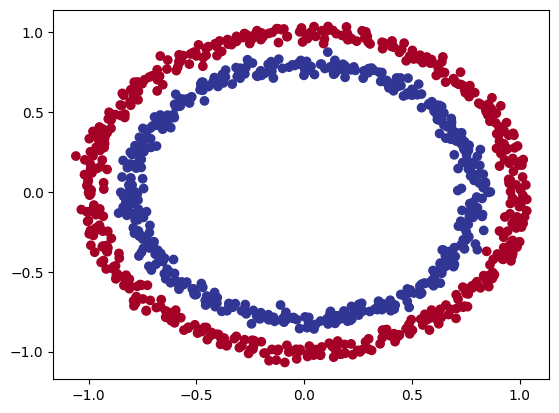

In [5]:
#visualize as a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

##Input and Output Shape

In [6]:
#Checking the shpaes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
#no. of samples
len(x), len(y)

(1000, 1000)

In [8]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

##Steps in Modeling

The steps in modeling with tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweek the model
6. Evaluate

In [9]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [10]:

tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4947 - loss: 5.7593
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4385 - loss: 5.3725
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5065 - loss: 5.6996
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5181 - loss: 6.8516
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5181 - loss: 6.8493


In [11]:
##Improving the model by training for longer
model_1.fit(x,y,epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4630 - loss: 8.0861  


[7.575654029846191, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy.. it's performing as if it guessing.

So, let's step things up a notch and add an extra layer




In [12]:


tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(x,y,epochs=100, verbose=0)

model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6934  


[0.6932077407836914, 0.5]

In [13]:
model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6934 


[0.6932077407836914, 0.5]

##Improving our model


Adding the more  layers & increaes the layers of the hidden units

Using the different optimization function such as Adam

We also can fit more epochs for our model


In [14]:

tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x,y,epochs=100, verbose=0)


In [15]:
model_3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5103 - loss: 0.6915  


[0.6950024366378784, 0.4909999966621399]

#Let's us create another model

In [16]:
tf.random.set_seed(42)
x_regression=tf.range(0,1000, 5)
y_regression=tf.range(100,1100,5)

x_reg_train=x_regression[:150]
x_reg_test=x_regression[150:]


y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


# x_regression, y_regression
x_reg_train.shape, x_reg_test.shape


(TensorShape([150]), TensorShape([50]))

In [17]:

tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(tf.expand_dims(x_reg_train, axis=1),y_reg_train,epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 508.7913 - mae: 508.7913
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 361.7161 - mae: 361.7161 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 214.3249 - mae: 214.3249
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 73.3585 - mae: 73.3585 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 80.3597 - mae: 80.3597 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 89.9812 - mae: 89.9812   
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.0841 - mae: 54.0841 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49.2406 - mae: 49.2406 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.7608 - mae: 42.7608 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45.8345 - mae: 45.8345 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.9986 - mae: 42.9986 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.4714 - mae: 42.4714 
Epoch 13/100
5/5 ━

In [18]:
model_4.evaluate(x_reg_test,y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 55.9917 - mae: 55.9917 


[58.55222702026367, 58.55222702026367]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


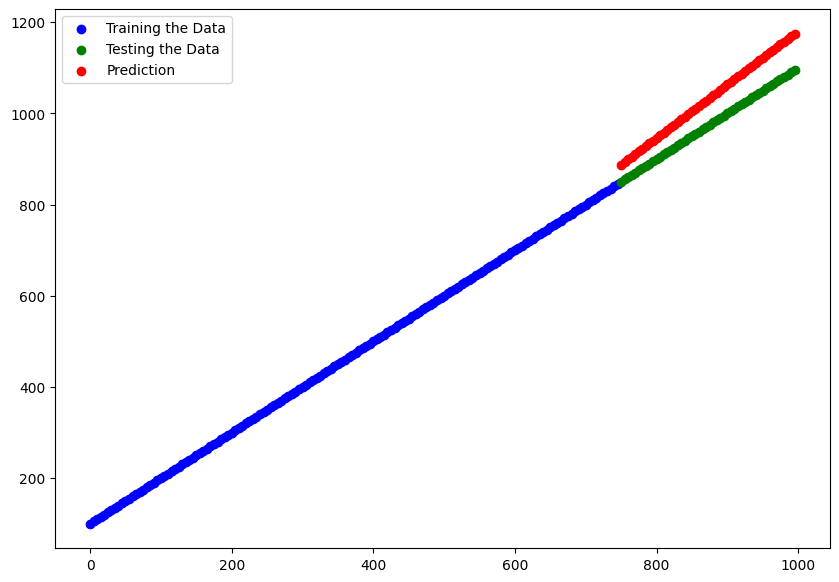

In [19]:
#making the predictioin with our trained model
y_reg_pred=model_4.predict(x_reg_test)
y_reg_pred

#plot the model's prediction against our regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training the Data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Testing the Data")
plt.scatter(x_reg_test, y_reg_pred, c="r", label="Prediction")
plt.legend()

#The Missing Piece: Non-linearity part

In [20]:

tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_5.fit(x, y,epochs=100)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4830 - loss: 4.8425   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 4.6813 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 4.5775 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4811 - loss: 4.4382 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4810 - loss: 4.3674
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4755 - loss: 4.2550 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4531 - loss: 4.1396 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4369 - loss: 4.0597
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4222 - loss: 4.0009 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4137 - loss: 3.8906
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4038 - loss: 3.8016 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

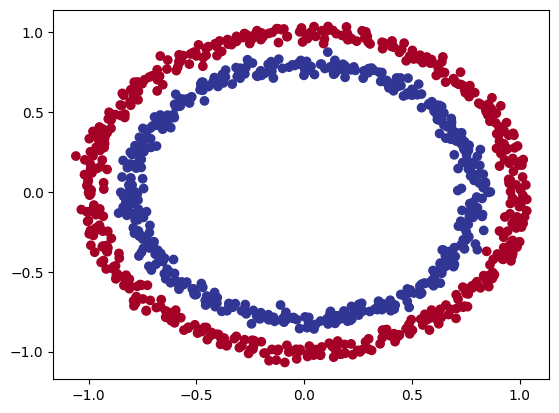

In [21]:
#checking our data
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [22]:
# #checking the decision boundary
# plot_decision_boundary(model=model_5,
#                        x=x,
#                        y=y)

#Building the first neural network with the non-linear activation function

In [23]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),

])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_6.fit(x,y,epochs=100, verbose=1)



Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5167 - loss: 6.1731
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5172 - loss: 6.1700 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5172 - loss: 6.1693 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 6.1694 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 6.1656 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5154 - loss: 6.1668
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 6.1633 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 6.1630 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 6.1627 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 6.1624 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 6.1621 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [24]:
model_6.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4369 - loss: 6.5316  


[6.014358043670654, 0.4740000069141388]

In [25]:
#time to replicate the multi layer neural network from the tensorflow playground

tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


history = model_7.fit(x, y, epochs=250, verbose=1)

# x.shape, y.shape

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4830 - loss: 0.6948
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 0.6892
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4858 - loss: 0.6858
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5127 - loss: 0.6834
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.6816
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5216 - loss: 0.6802
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5518 - loss: 0.6790
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5744 - loss: 0.6780
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5935 - loss: 0.6771
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6047 - loss: 0.6762
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6105 - loss: 0.6753
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [26]:
model_7.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9824 - loss: 0.0698  


[0.06616109609603882, 0.9860000014305115]

In [27]:
#how do our model's prediction loooks like
# plot_decision_boundary(model_7, x,y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


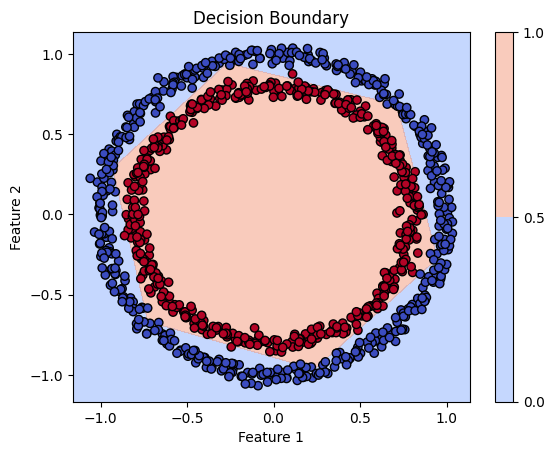

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary of a trained model.

    Parameters:
    - model: Trained TensorFlow model
    - X: Input features (2D)
    - y: Target labels (binary classification)
    """
    # Define min and max values for the plot
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a grid of points with a small step size
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Stack and reshape into (N, 2) for model predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities for each grid point
    preds = model.predict(grid_points)
    preds = preds.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.5, cmap="coolwarm")
    plt.colorbar()

    # Plot actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="coolwarm", edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Call the function
plot_decision_boundary(model_7, x, y)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


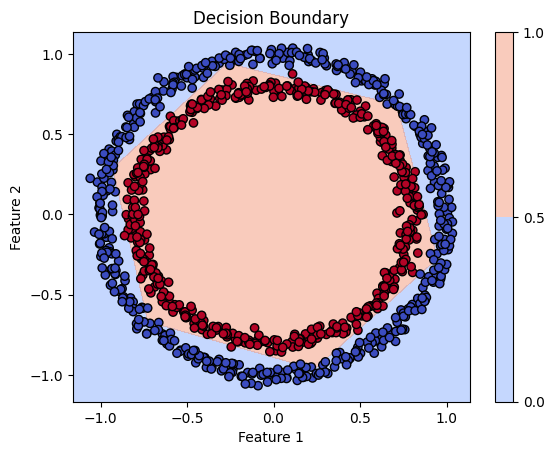

In [29]:
plot_decision_boundary(model_7, x, y)

In [30]:
#Create a toy tensor(similar to the data we pass into our model)
A=tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

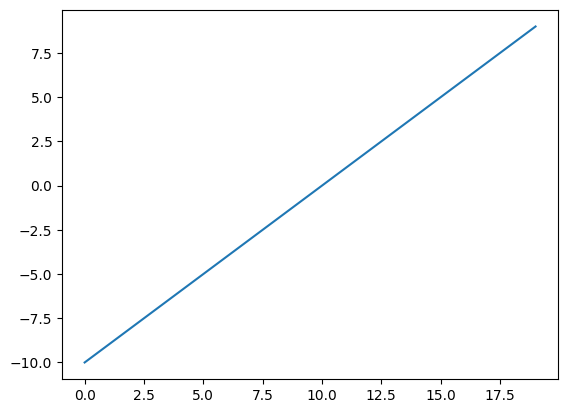

In [31]:
#vislauising our toy tensor
plt.plot(A)

In [32]:
#Let's start by replicating sigmoid -sigmoid(x)=1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [33]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

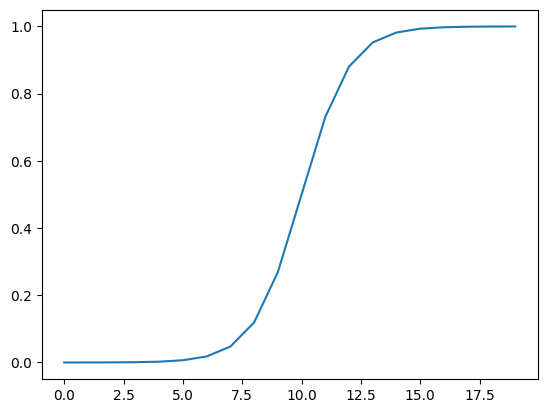

In [34]:
plt.plot(sigmoid(A))

In [35]:
#let's create the relu function
def relu(x):
  return tf.maximum(0,x)

In [36]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [37]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

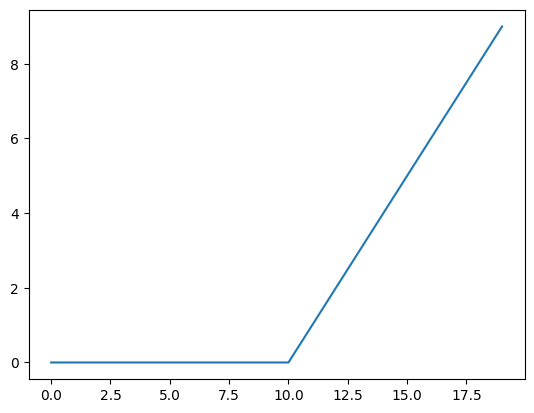

In [38]:
plt.plot(relu(A))

In [39]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [40]:
#let's try the linear activation functioin
# def linear(x):


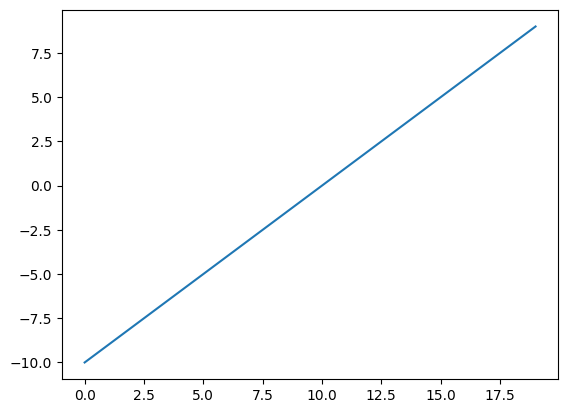

In [41]:
plt.plot(tf.keras.activations.linear(A))

In [42]:
#does A== tf.keras.activation.linear(A)
A== tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

#Evaluating and Improving our Classification

In [43]:
x.shape,y.shape

((1000, 2), (1000,))

In [44]:
x_train, y_train=x[:800], y[:800]
x_test, y_test=x[800:], y[800:]

x_train.shape, x_test.shape,y_train.shape,  y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
#Creating the model to fit and to evaluate on the training and testing the data
#time to replicate the multi layer neural network from the tensorflow playground

tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])


history = model_8.fit(x_train, y_train, epochs=25, verbose=1)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4356 - loss: 0.6950
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4949 - loss: 0.6908 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4968 - loss: 0.6890 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5237 - loss: 0.6868 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5446 - loss: 0.6801 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6168 - loss: 0.6644 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - loss: 0.6347 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7639 - loss: 0.5896 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8619 - loss: 0.5191 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9281 - loss: 0.4236 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9905 - loss: 0.3241
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

In [46]:
model_8.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9892 - loss: 0.0508  


[0.04482344537973404, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


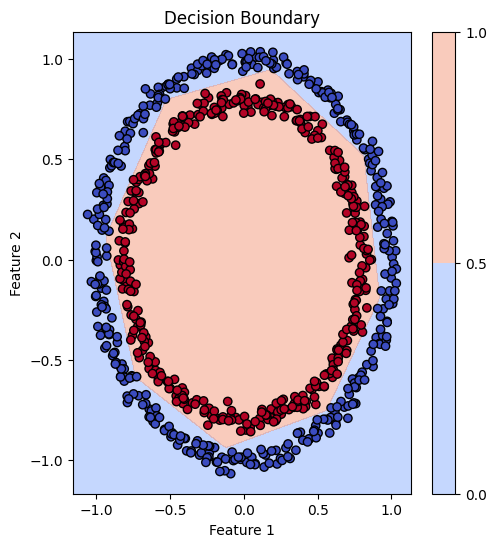

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


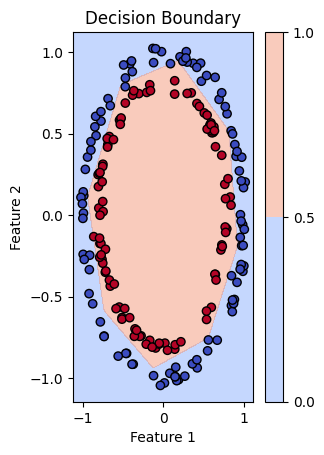

In [47]:
#ploting the decision boundaries for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, x_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, x_test,y_test)
plt.show();

##Plot thr loss (or training) curves

In [48]:
history.history

{'accuracy': [0.4625000059604645,
  0.5174999833106995,
  0.53125,
  0.5537499785423279,
  0.5987499952316284,
  0.637499988079071,
  0.7237499952316284,
  0.8050000071525574,
  0.8862500190734863,
  0.9512500166893005,
  0.987500011920929,
  0.9912499785423279,
  0.9925000071525574,
  0.9937499761581421,
  0.9950000047683716,
  0.9962499737739563,
  0.9962499737739563,
  0.9962499737739563,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858],
 'loss': [0.6923977732658386,
  0.6883053779602051,
  0.6849992871284485,
  0.6806540489196777,
  0.6720651984214783,
  0.6549597978591919,
  0.6230646371841431,
  0.5736322999000549,
  0.4992049038410187,
  0.4004296064376831,
  0.30291956663131714,
  0.22896301746368408,
  0.17686130106449127,
  0.1413441151380539,
  0.1164424791932106,
  0.09858913719654083,
  0.08530488610267639,
  0.07527444511651993,
  0.06734946370124817,
  0.0610482059419

###Coverting the history object into a DataFrame

In [49]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.46250,0.692398
1,0.51750,0.688305
2,0.53125,0.684999
3,0.55375,0.680654
4,0.59875,0.672065
5,0.63750,0.654960
6,0.72375,0.623065
7,0.80500,0.573632
8,0.88625,0.499205
9,0.95125,0.400430


###Ploting the loss curves

Text(0.5, 1.0, 'Model_8 Loss Curves ')

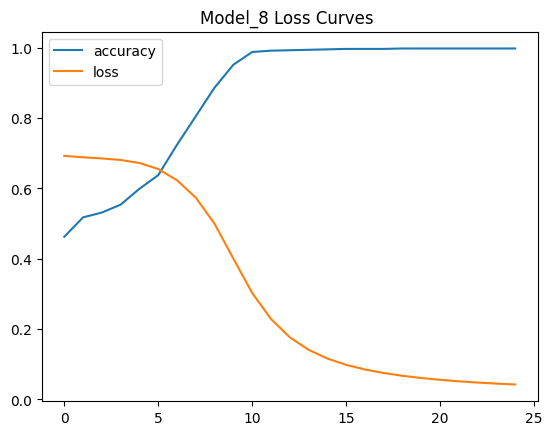

In [50]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curves ")

##Finding the best learning rate

To find the best learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

*A learning rate **call back** - you can think of a call back as an extra piece of functionality, you can add to your *while* it's training.

*Another model (we could use the same one as above, but we're practicing building model)

*A modified loss curves plot

In [51]:
#Creating the model to fit and to evaluate on the training and testing the data
tf.random.set_seed(42)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])


#Create a learning rate call back
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))


history_9 = model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4884 - loss: 0.7086 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4881 - loss: 0.7081 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4883 - loss: 0.7076 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4888 - loss: 0.7070 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4903 - loss: 0.7064 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4886 - loss: 0.7057 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4880 - loss: 0.7051 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4866 - loss: 0.7044 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4661 - loss: 0.7037 - learning_

In [52]:
pd.DataFrame(history_9.history)

,accuracy,loss,learning_rate
0,0.48500,0.711682,0.000100
1,0.48500,0.711100,0.000112
2,0.48125,0.710482,0.000126
3,0.48250,0.709824,0.000141
4,0.48375,0.709123,0.000158
...,...,...,...
95,0.48875,0.780846,5.623413
96,0.48375,0.829769,6.309574
97,0.48625,0.881919,7.079458
98,0.48625,0.933604,7.943282


<Axes: xlabel='epochs'>

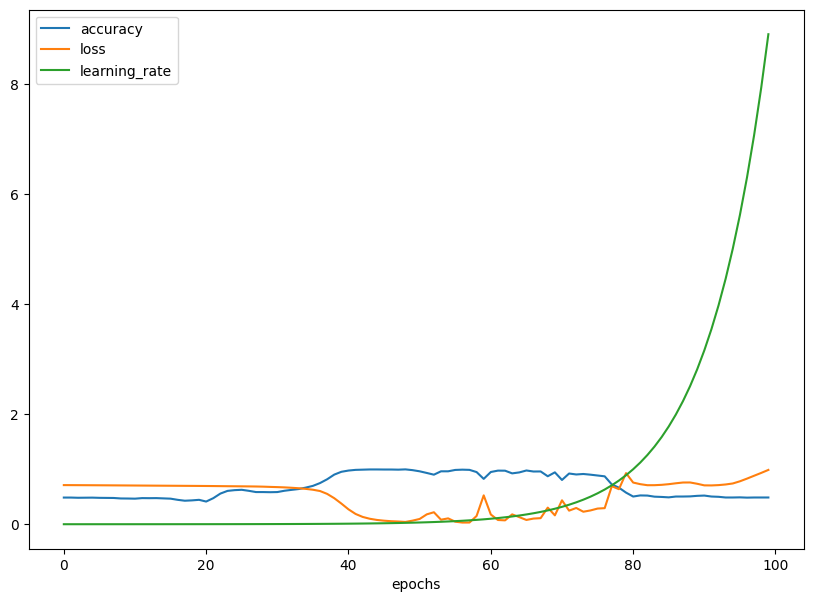

In [53]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

###Ploting the learning rate versus the loss


Text(0.5, 1.0, 'Learning Rate vs Loss')

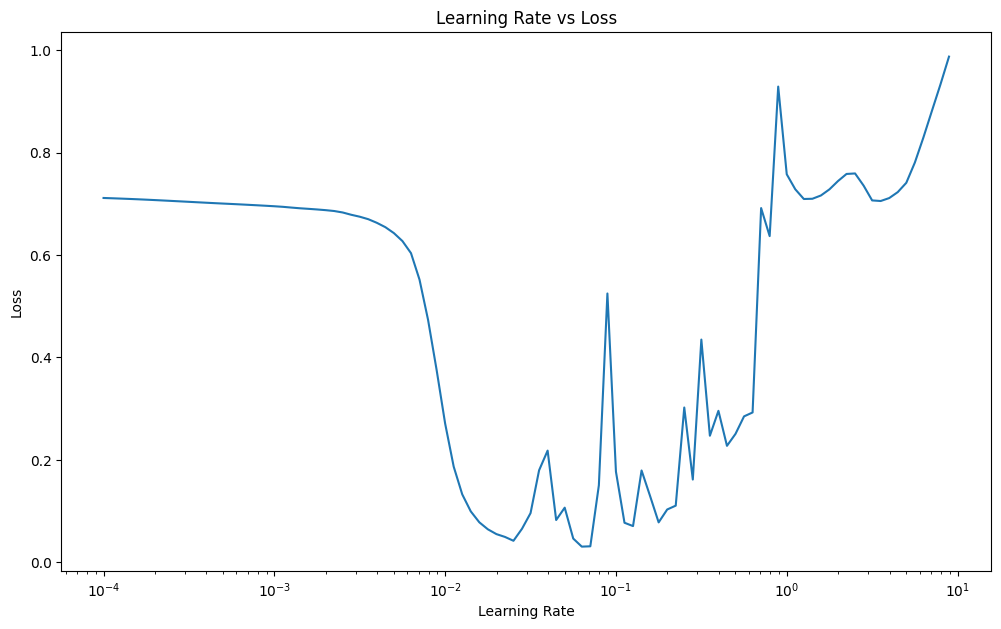

In [54]:
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(12,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [55]:
#let's try using the higher *ideal* learning rate with the same model before
#Creating the model to fit and to evaluate on the training and testing the data
tf.random.set_seed(42)
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])


#Create a learning rate call back
# lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))


history_10 = model_10.fit(x_train, y_train, epochs=20)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4630 - loss: 0.6965
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4984 - loss: 0.6933 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4733 - loss: 0.6933 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 0.6933 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 0.6933 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 0.6933 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 0.6933 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 0.6933 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 0.6933 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 0.6933 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 0.6933 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [56]:
model_10.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5485 - loss: 0.6927  


[0.6932109594345093, 0.4950000047683716]

In [57]:
model_8.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9892 - loss: 0.0508 


[0.04482344537973404, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


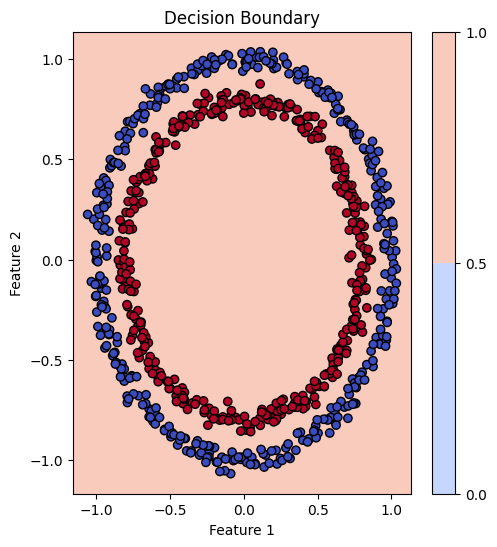

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


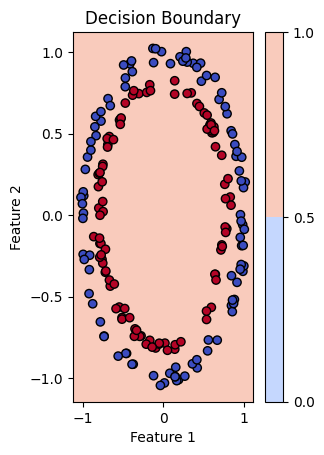

In [58]:
#plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_10, x_train, y_train)


plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, x_test, y_test)
plt.show()


#Introducing more classification evaluation methods

Alongside visualising our model results as much as possible, there are a handful of other classification evaluation methods that you should be familar with:

*Accuracy

*Precision

*Recall

*F1-score

*Confusion

*Classification report( from sklict lear)


In [59]:
#checking the accuaracy of our model
loss, accuracy =model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model Accuracy on the test set: {(accuracy*100):.2f}%")
# loss, accuracy

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5485 - loss: 0.6927 
Model loss on the test set: 0.6932109594345093
Model Accuracy on the test set: 49.50%


###How about the Confusion matries?

In [60]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#making the prediction
y_preds=model_10.predict(x_test)

#create confusion matrix
# confusion_matrix(y_test, y_preds)

##ValueError: Classification metrics can't handle a mix of binary and continuous targets

#-> we need to convert into the binary form

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [61]:
#Converting prediction probabilities to the Binary Format and view the first 10
y_preds_1=tf.round(y_preds)[:10]
y_preds_1

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [62]:
#creating the confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[  0, 101],
       [  0,  99]])

#How about we preetify our confusion matrix


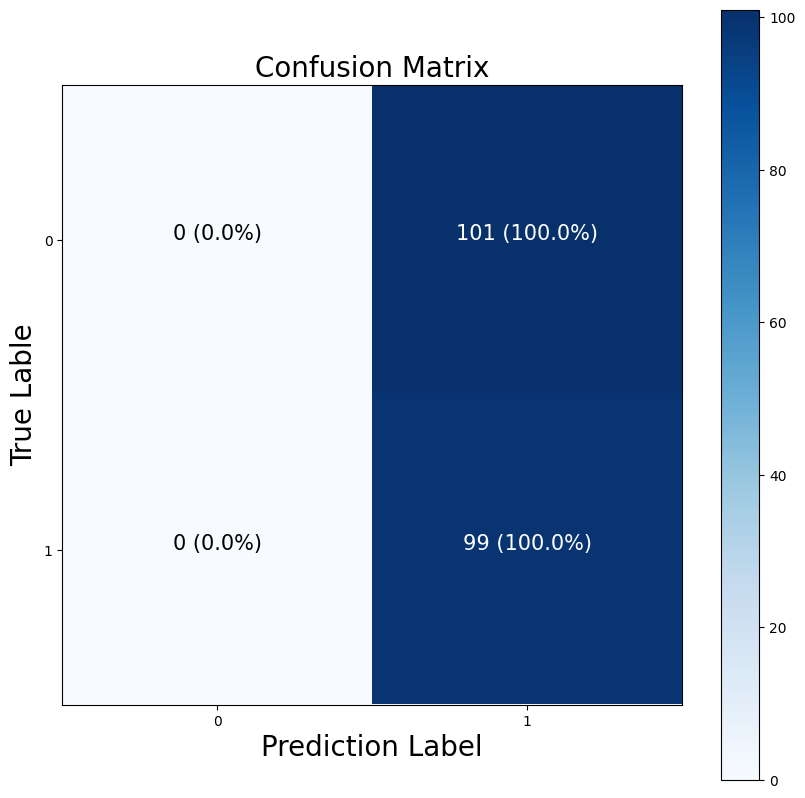

In [63]:
import itertools
figsize=(10,10)
#creating the confusion matrix
cm=confusion_matrix(y_test, tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion
n_class=cm.shape[0]

#let's preetify it
fig, ax=plt.subplots(figsize=figsize)

#create a matrix plot
cax=ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#craete a classes
classes=False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#label the axis
ax.set(title="Confusion Matrix",
       xlabel="Prediction Label",
       ylabel="True Lable",
       xticks=np.arange(n_class),
       yticks=np.arange(n_class),
       xticklabels=labels,
       yticklabels=labels)


ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#set the threshold for thr different colors
threshold=(cm.max()+cm.min())/2

#plot the test on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)



#Working wiht the larger example(multi class example)

when we have more than two classes as an option, it's known as **multi-class classification**

*This means if you have 3 different classes, it's multi class classificatin

*it also means if you have 100 different classes, it's multi class- classification

To practice the multi class classification, we're going to build a neural network to classify images of diffreent items of clothing.




In [64]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has already been sorted into training and tests set for us
(train_data, train_labels),(test_data, test_labels) =fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [72]:
#show the first training example

# train_data,train_labels
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [66]:
#check the shape of a single label
train_data[0].shape, train_labels[0].shape


((28, 28), ())

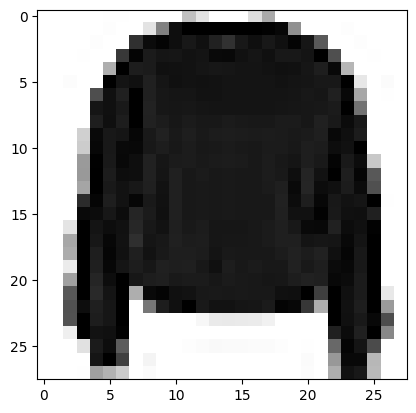

In [80]:
#plot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7],cmap=plt.cm.binary);

In [68]:
#chech the sampl label
train_labels[7]

2

In [74]:
#create a small list so we can index onto our training label so they are human-readable
class_name=["T-shirt", "Trouser", " Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle-Boot"]
len(class_name)


10

Text(0.5, 1.0, 'Dress')

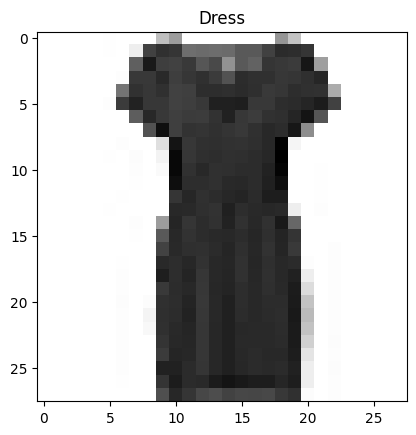

In [79]:
#plot an exapmle onject and its label
index_of_choice=20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

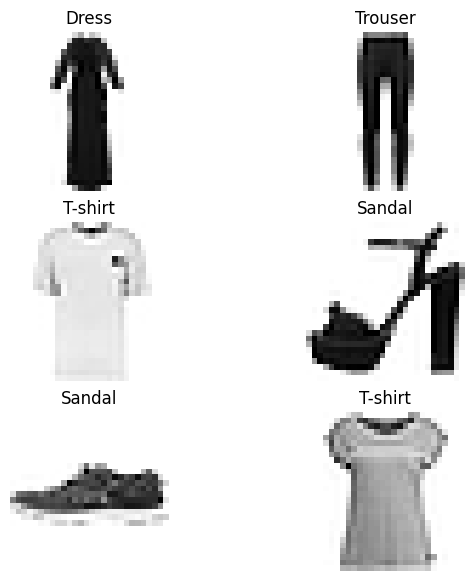

In [103]:
#ploting the multiple random images of the fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(6):
  ax=plt.subplot(3,2,i+1) ## Creating a 2x3 grid of subplots, placing the image in position (i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False) # Hiding the axis to make the images look cleaner

#Builduig a multi class classification model

For our multi class classification model, we can use a similar architecture to our binary  classifiers, however we are going to have to tweak a few things:

*Input shape: 28X28 (the shape of the one image)

*Output shape: 10(one per class of clothing)

*Loss Function:  tf.keras.CategoricalClassentropy()

  ->if your label are one-hot encoding, use CategoricalClassentropy()

  ->if your label are integer form, use CategoricalClassentropy()

*Output layer activation:  Softmax(notsigmoid)



In [113]:
#our data need to be flattened (from 28*28 to None, 784)

flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [145]:
tf.random.set_seed(42)
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history=model_11.fit(train_data,
                              tf.one_hot(train_labels, depth=10),
                              epochs=10,
                              validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

                            #  (tf.expand_dims(x_reg_train, axis=1),y_reg_train,epochs=100)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.0710 - val_loss: 2.3072
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.0713 - val_loss: 2.3072
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.0713 - val_loss: 2.3072
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.0713 - val_loss: 2.3072
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.0713 - val_loss: 2.3072
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.0713 - val_loss: 2.3072
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.0713 - val_loss: 2.3072
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

In [120]:
model_11.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

###Neural Network prefer data to be scaled(or normalized), this means they like to have the numbers in tensor to find ptterns in  betweeen 0 & 1

In [124]:
train_data.min(), train_data.max()

(0, 255)

In [134]:
#we can get our training ans testing data betweeen 0 & 1 by dividing by the maximum
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

#check the min and the max vlaues of the scaled training data
train_data_norm.min(), train_data_norm.max()
# train_data, test_data

(0.0, 6.030862941101084e-08)

In [141]:
tf.random.set_seed(42)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history=model_12.fit(train_data_norm,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data_norm, test_labels))




Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1007 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - 

##Note: Neural Network tend to prefer data in numerical form as well as scaled/normalised (numbers between 0 & 1)

<Axes: title={'center': 'Normalized Data'}>

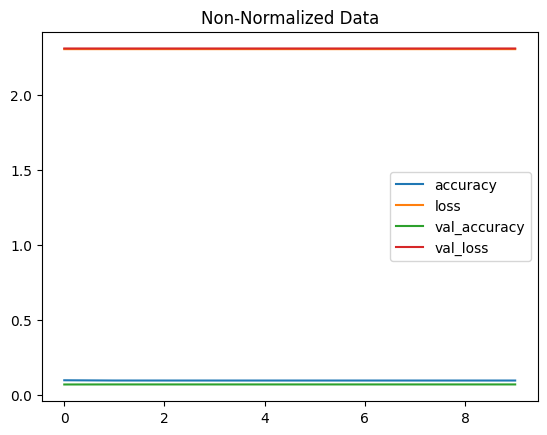

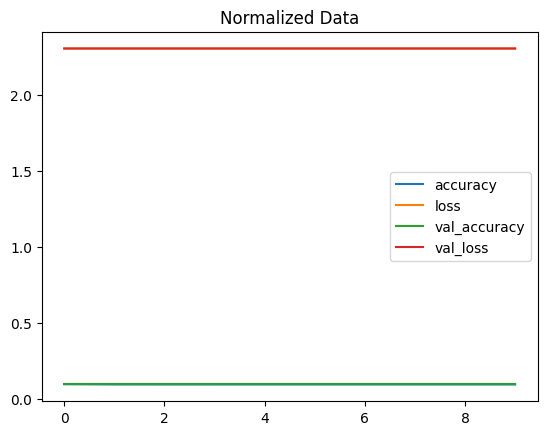

In [146]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")